In [9]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)
library(DescTools)
options(repr.plot.width = 12, repr.plot.height = 8)

# Wilson

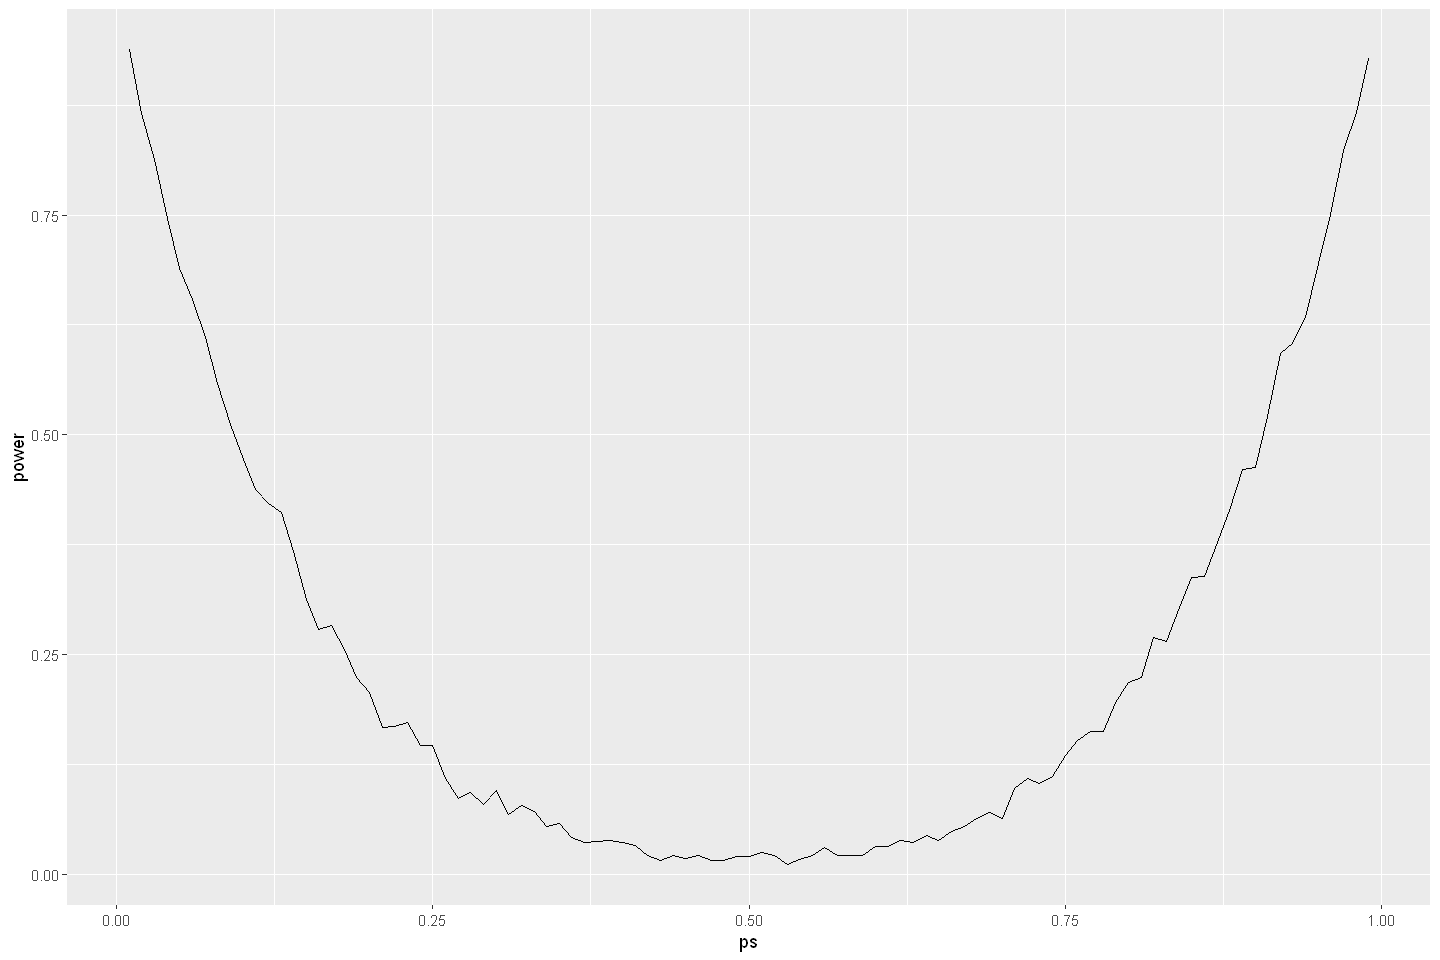

In [6]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

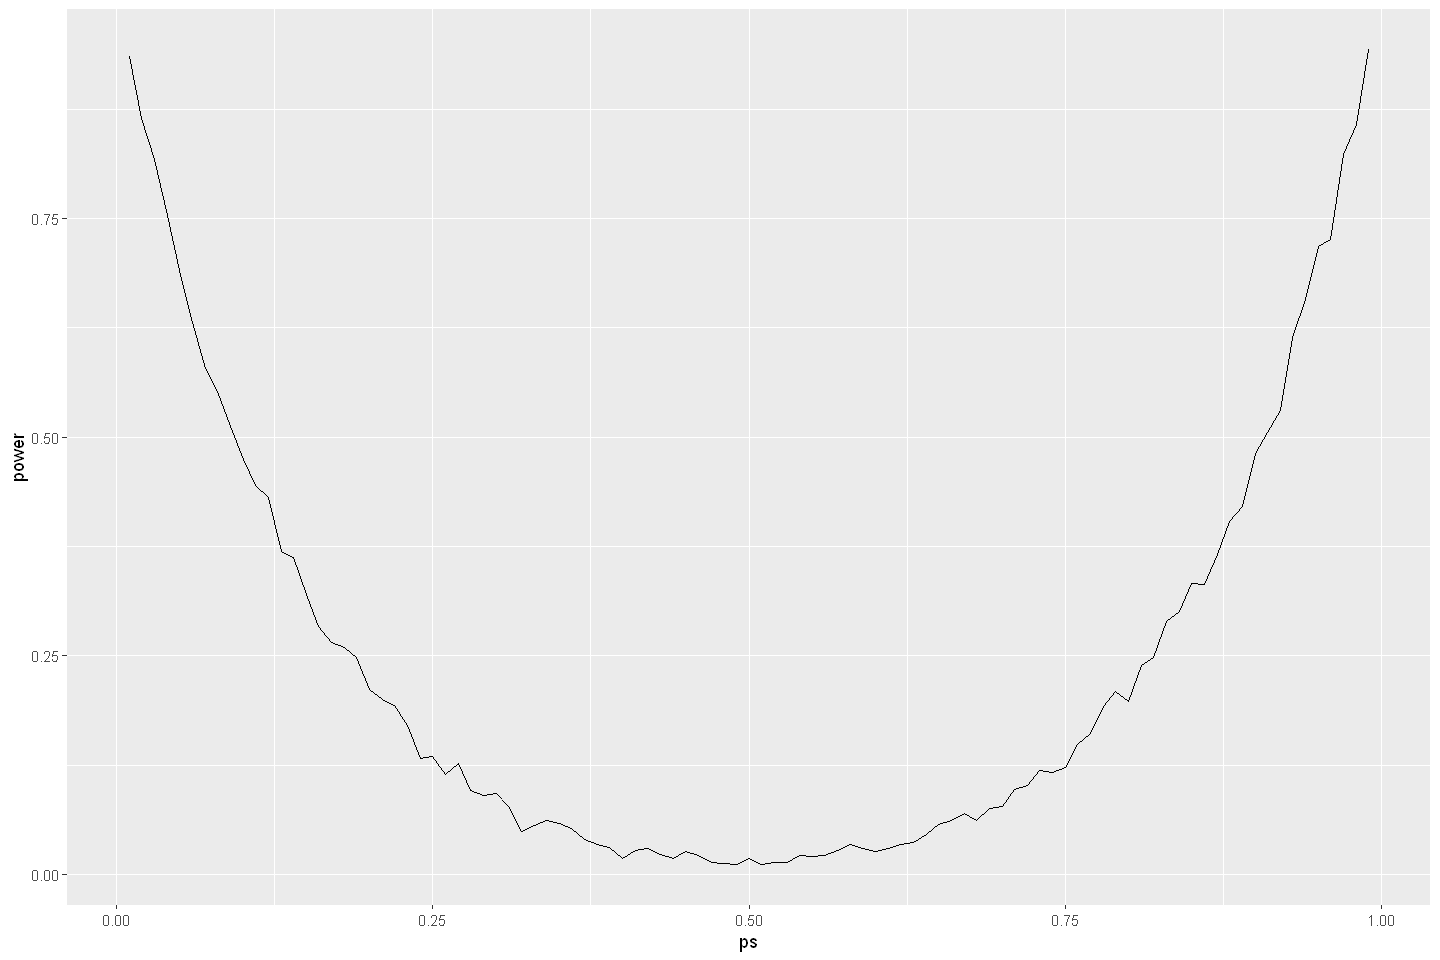

In [5]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    intervals <- BinomCI(S, n, method="wilson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Clopper-Pearson

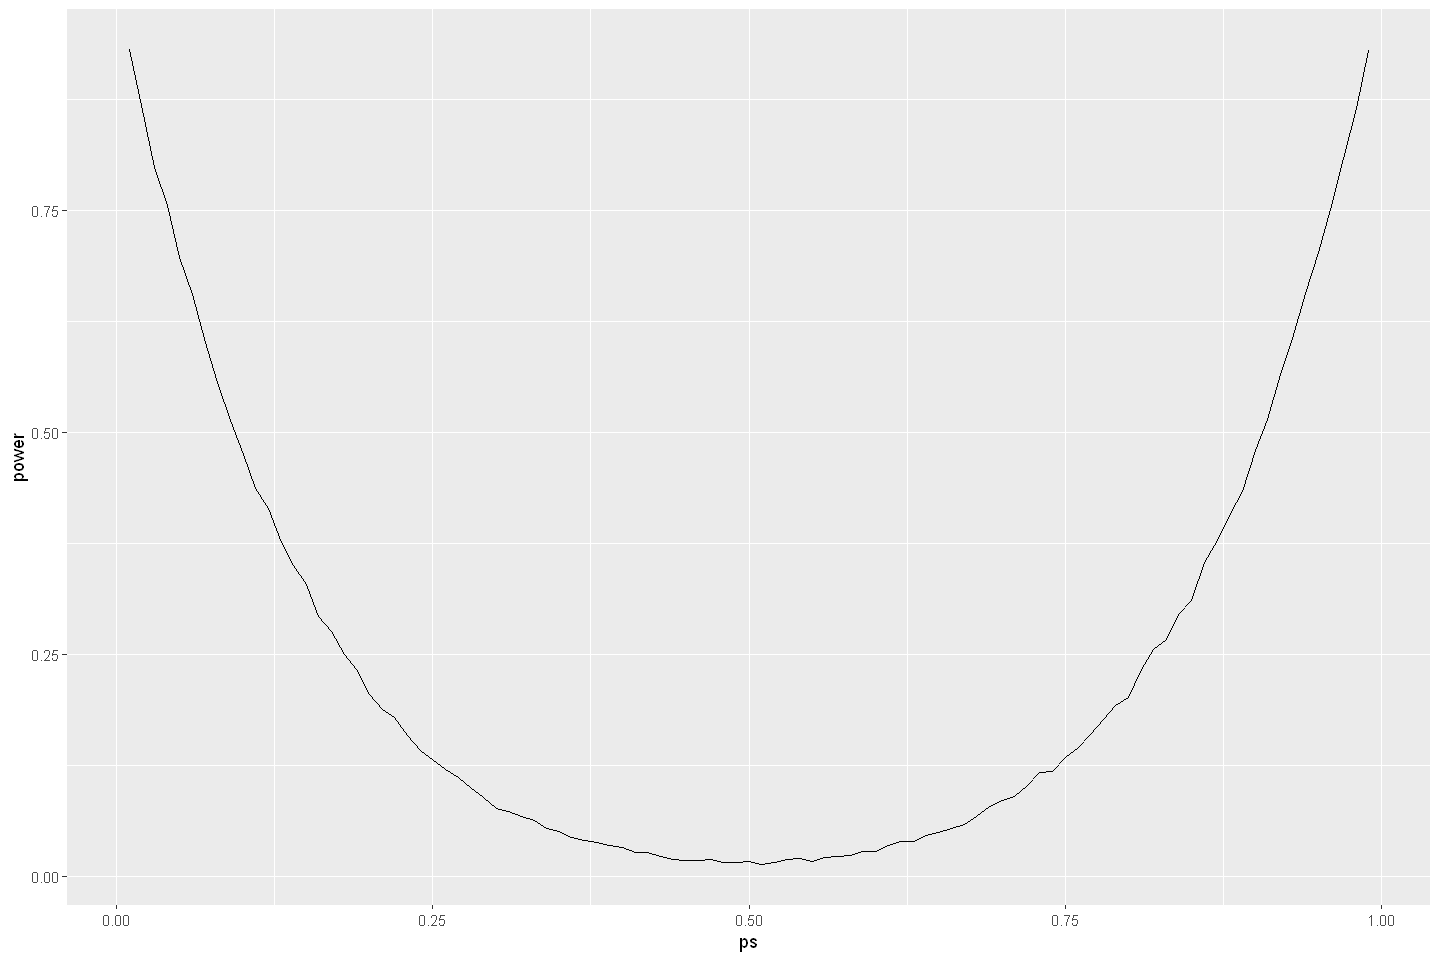

In [30]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- qbeta(alpha/2, S, n - S + 1) < p0  &  p0 < qbeta(1 - alpha/2, S + 1, n - S)
    #tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  dbinom(S, size=n, prob=p0) + pbinom(S, size=n, prob=p0, lower.tail=FALSE) > alpha/2 
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

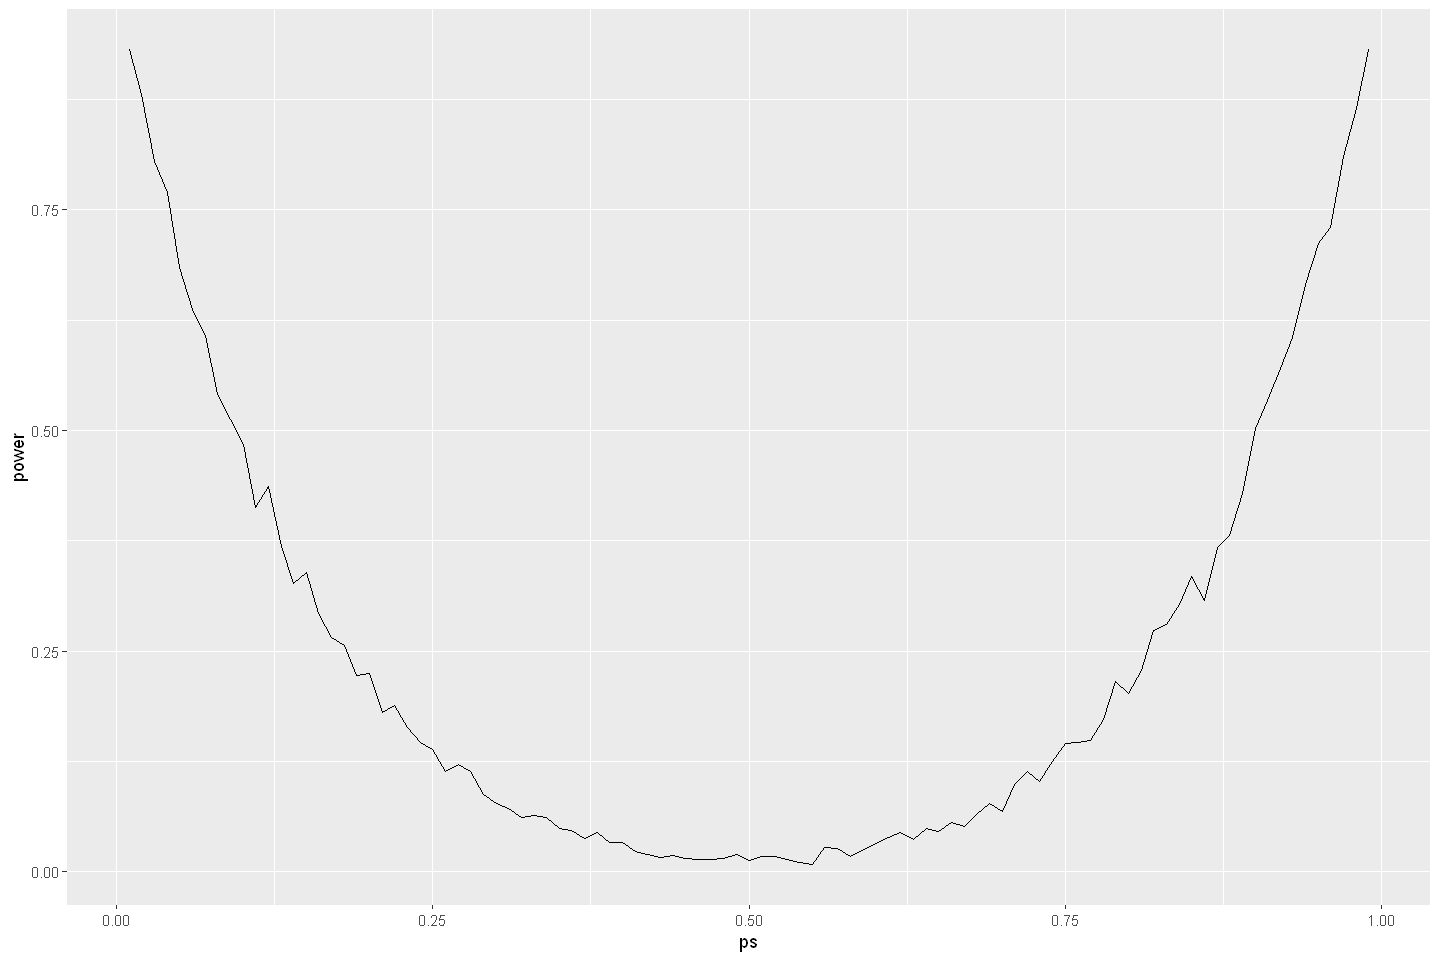

In [34]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    intervals <- BinomCI(S, n, method="clopper-pearson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Jeffreys

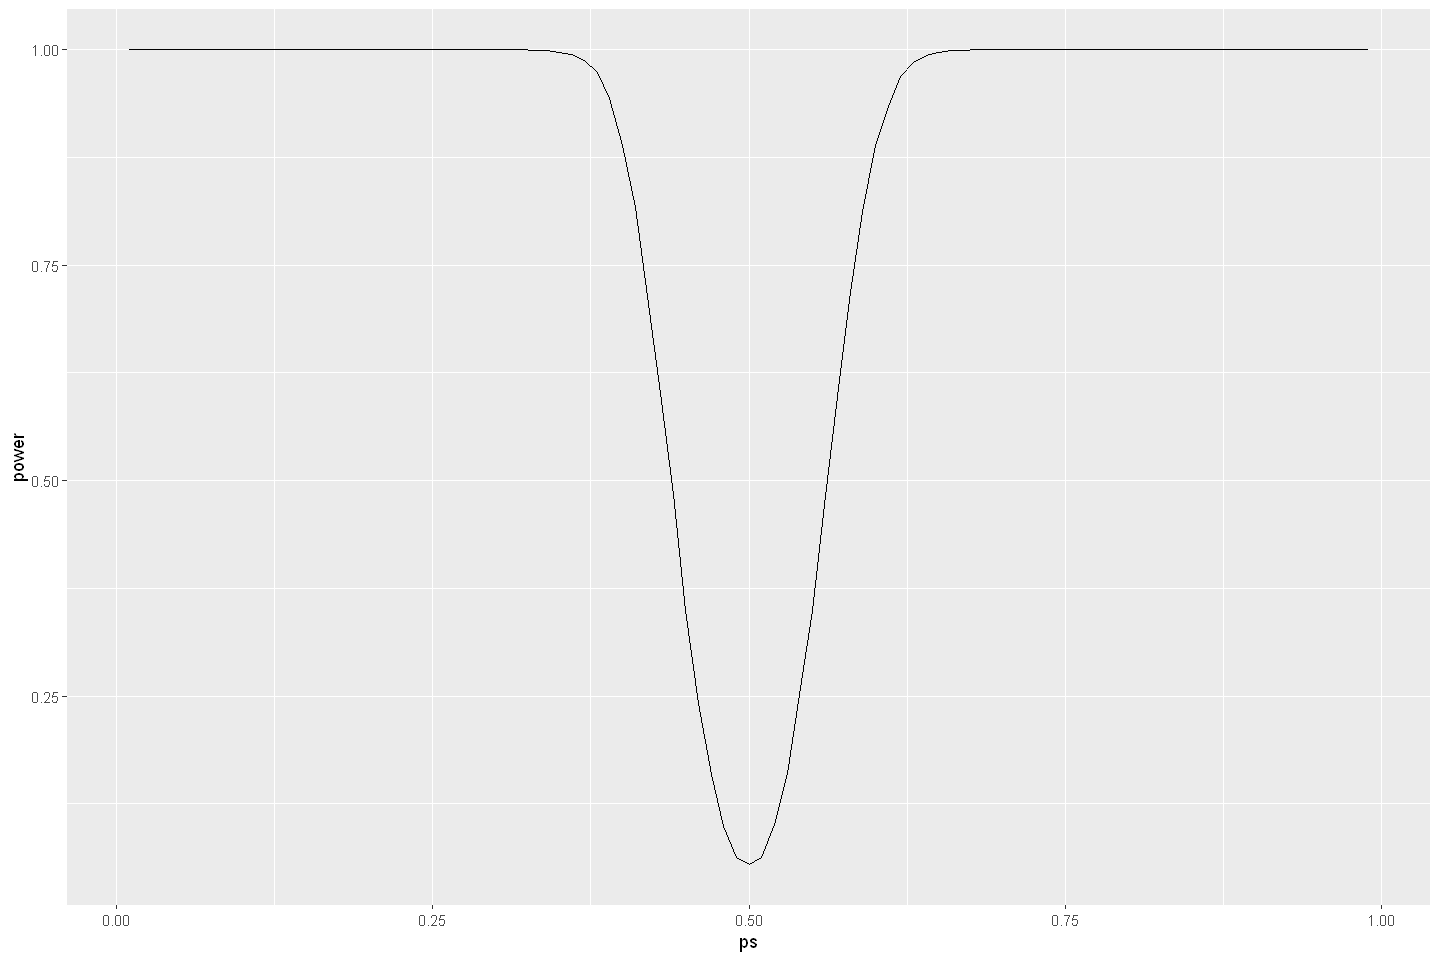

In [81]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

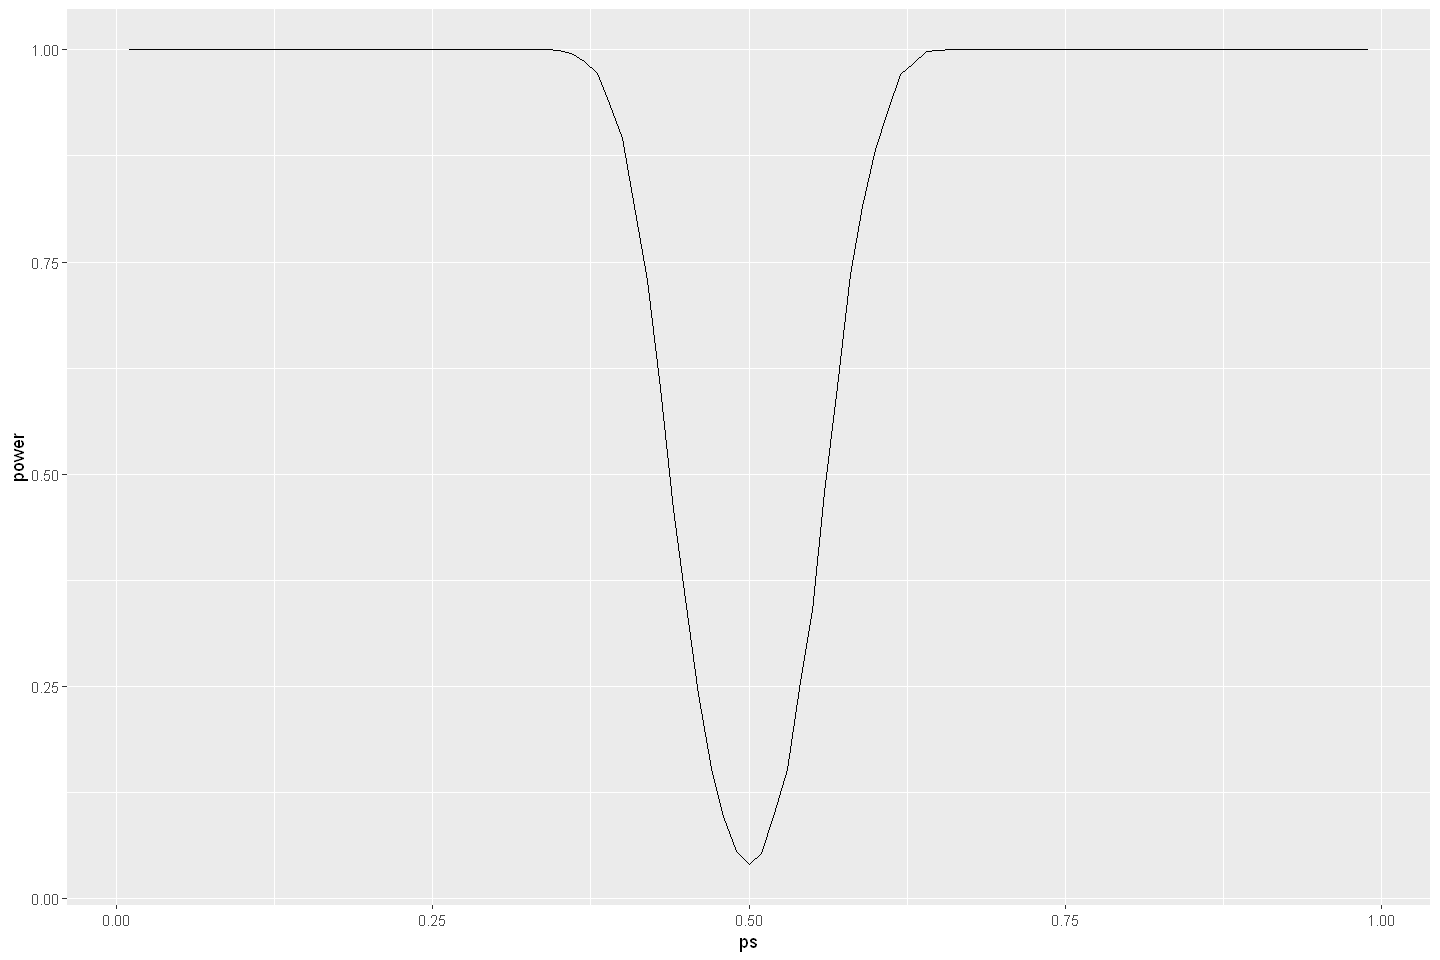

In [82]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    intervals <- BinomCI(S, n, method="jeffreys")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Porównanie

### $n = 7$

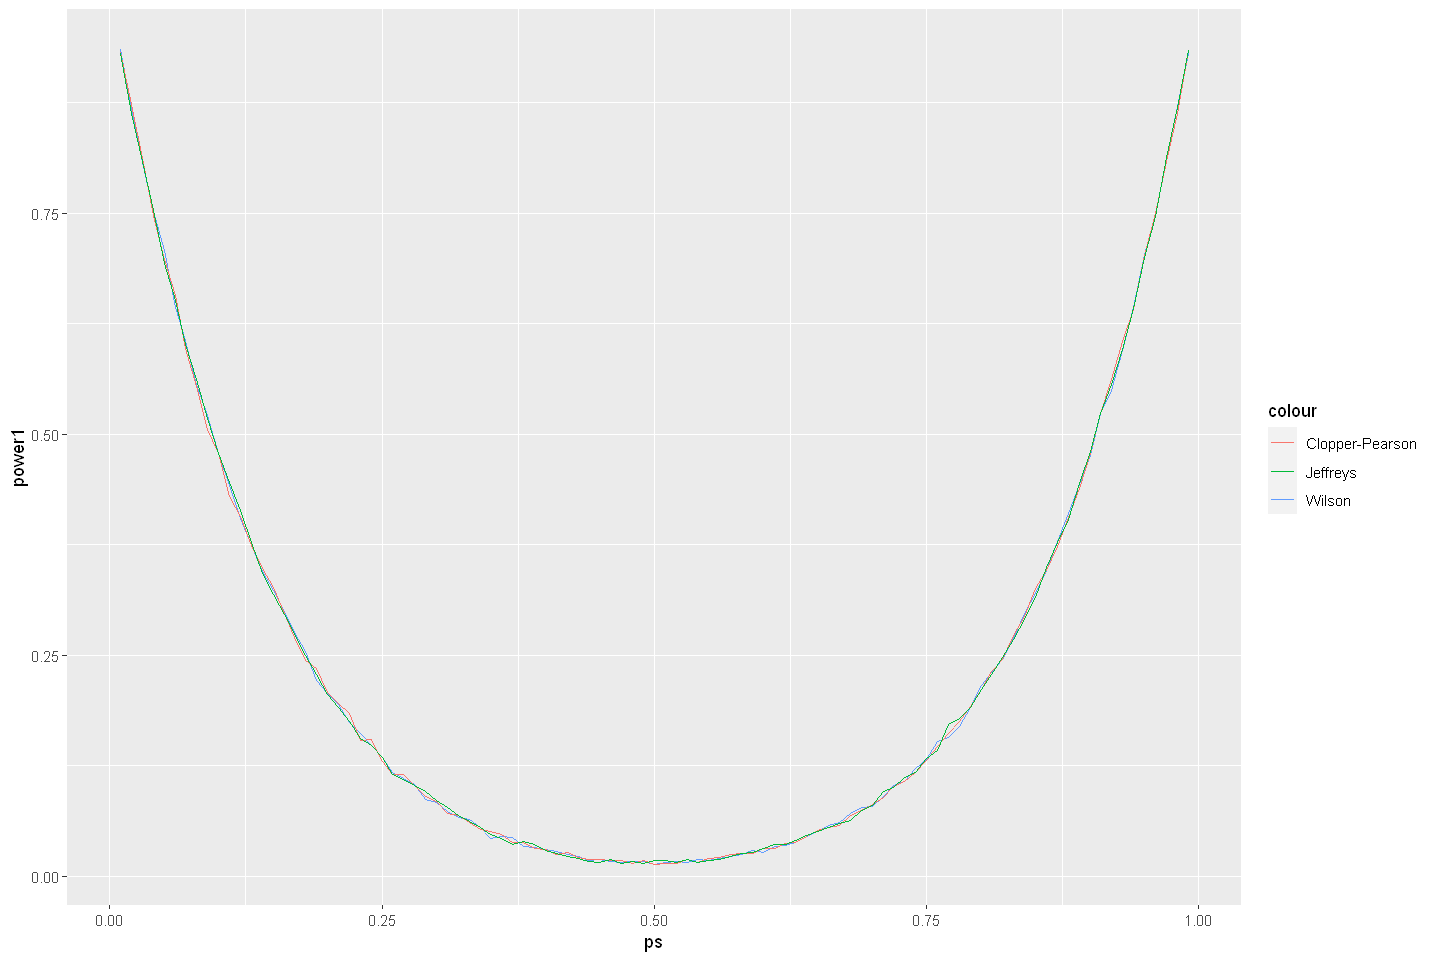

In [35]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

# Wilson
power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

# Clopper-Pearson
power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  dbinom(S, size=n, prob=p0) + pbinom(S, size=n, prob=p0, lower.tail=FALSE) > alpha/2
    power2 <- append(power2, 1 - sum(tests) / N)
}

# Jeffreys
power3 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

### $n = 35$

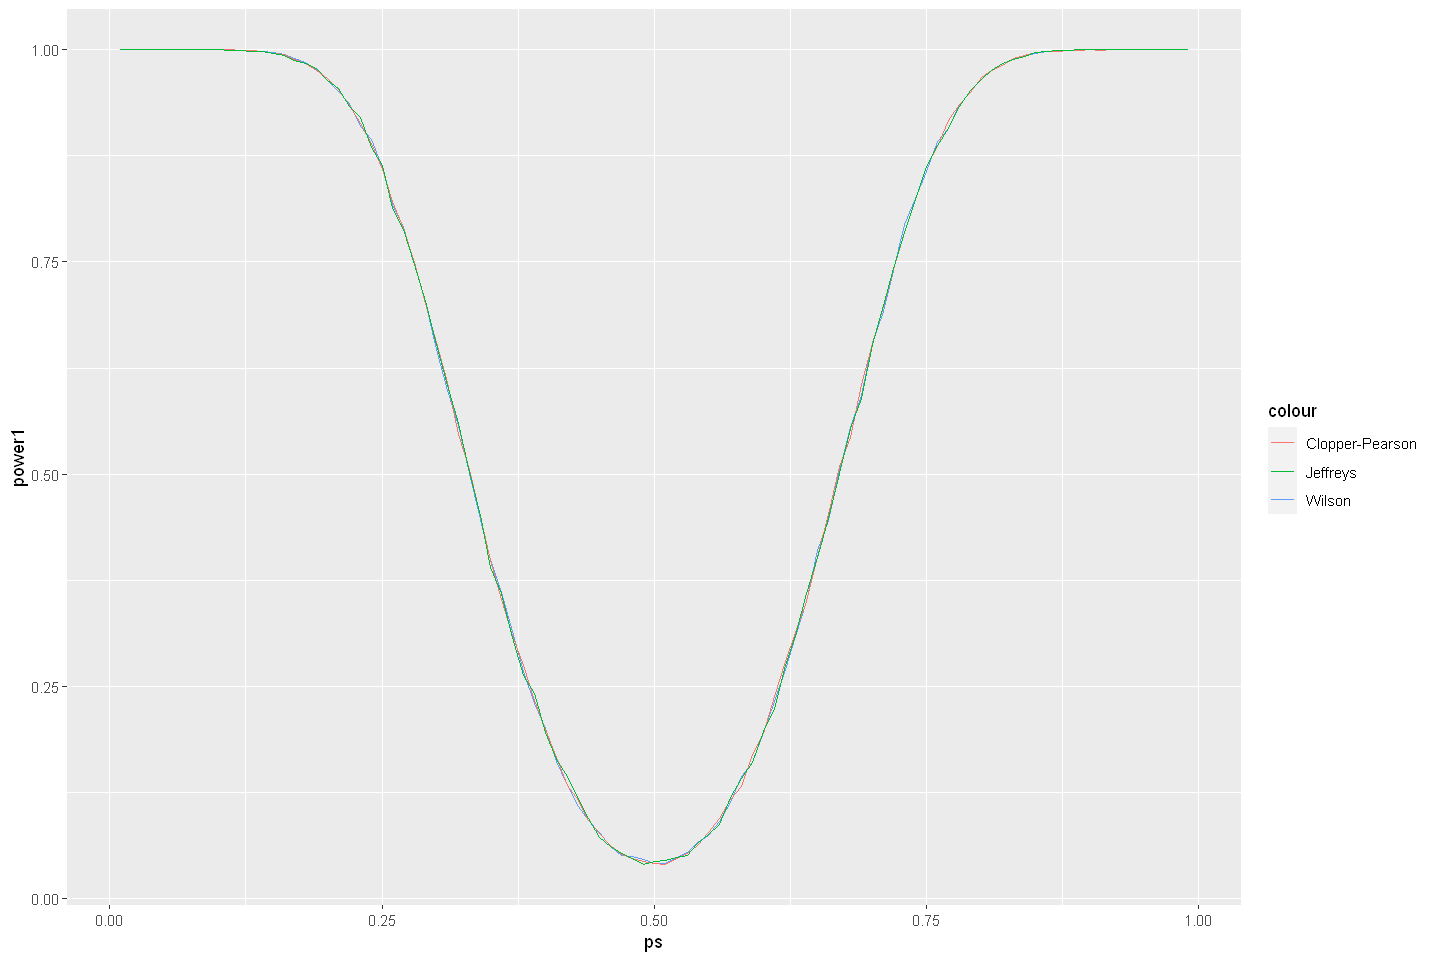

In [36]:
n <- 35
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

# Wilson
power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

# Clopper-Pearson
power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  dbinom(S, size=n, prob=p0) + pbinom(S, size=n, prob=p0, lower.tail=FALSE) > alpha/2
    power2 <- append(power2, 1 - sum(tests) / N)
}

# Jeffreys
power3 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

### $n = 250$

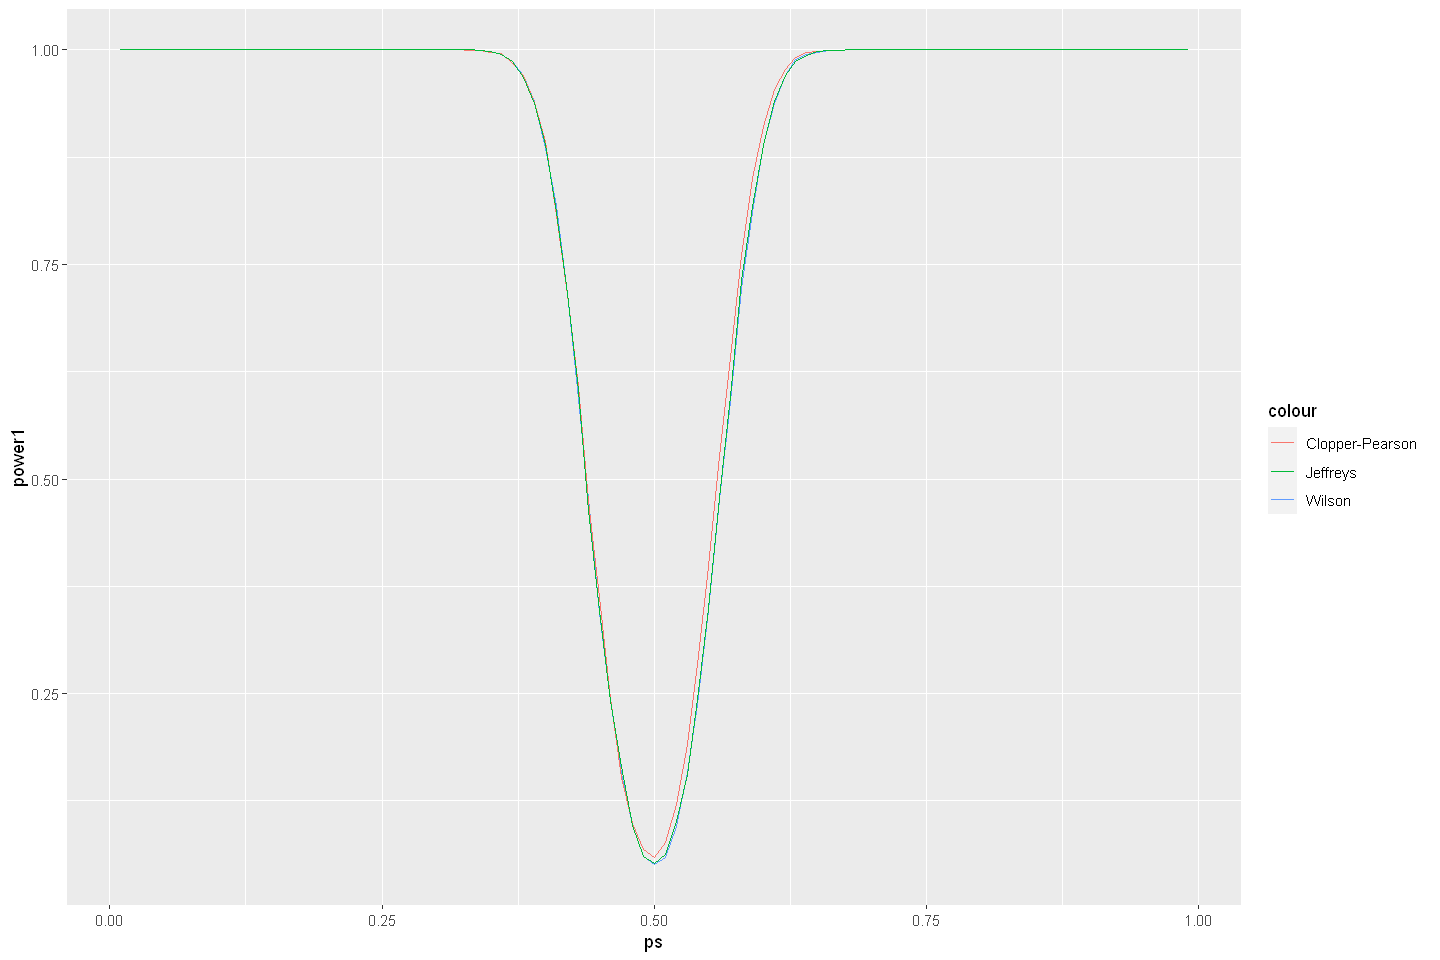

In [37]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  1 - pbinom(S, size=n, prob=p0) > alpha/2 
    power2 <- append(power2, 1 - sum(tests) / N)
}

power3 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

# Inne

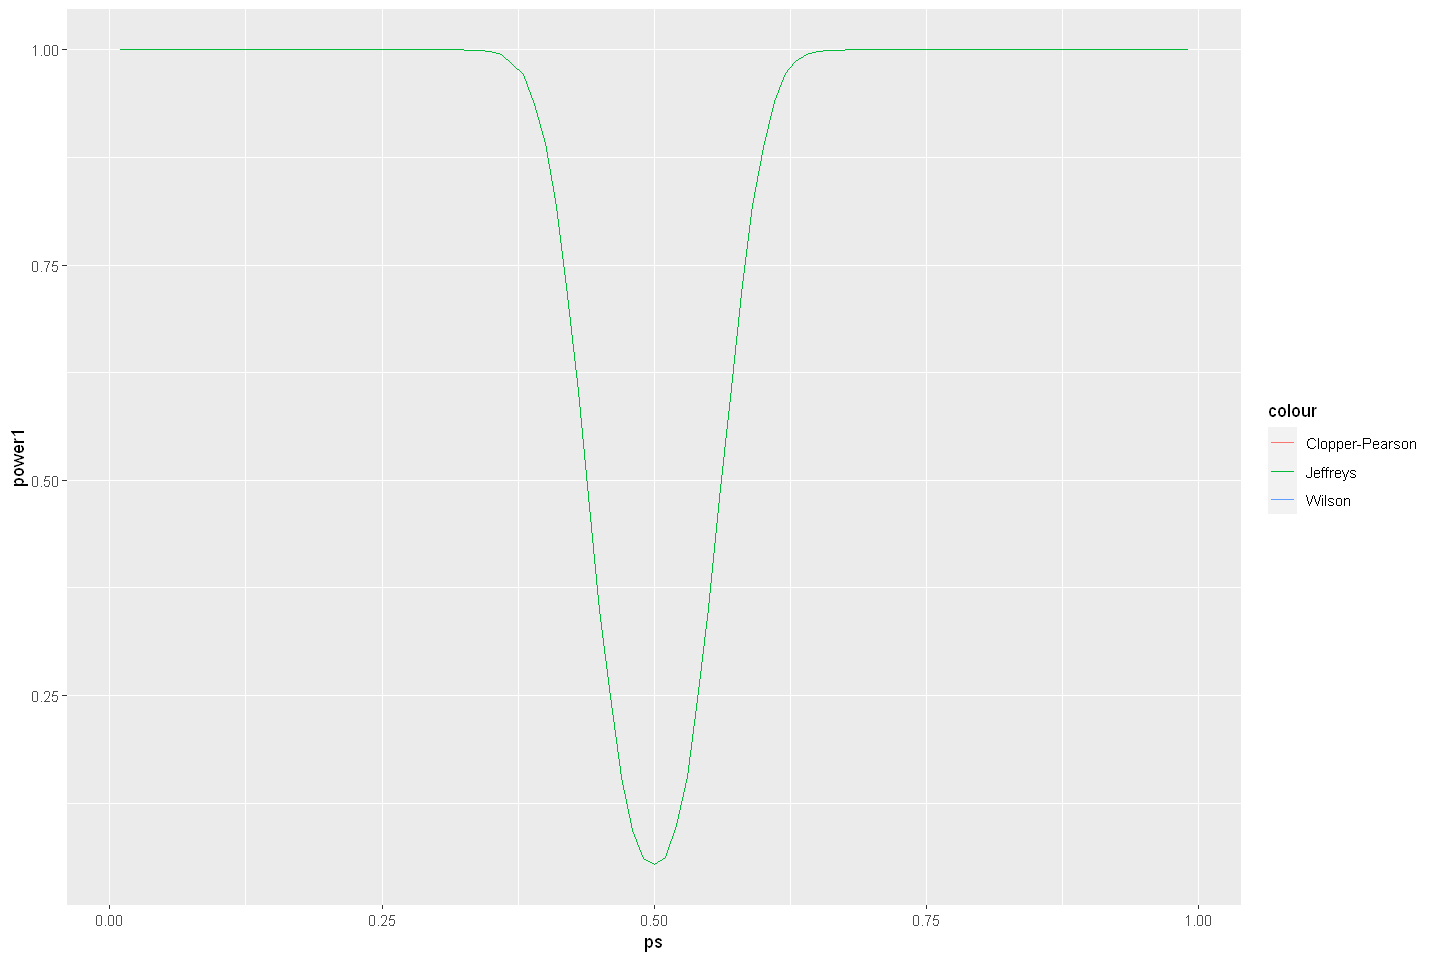

In [26]:
n <- 250
p0 <- 0.5
alpha <- 0.05
z <- qnorm(1 - alpha/2)
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S, n - S + 1) < p0  &  p0 < qbeta(1 - alpha/2, S + 1, n - S)
    power2 <- append(power2, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

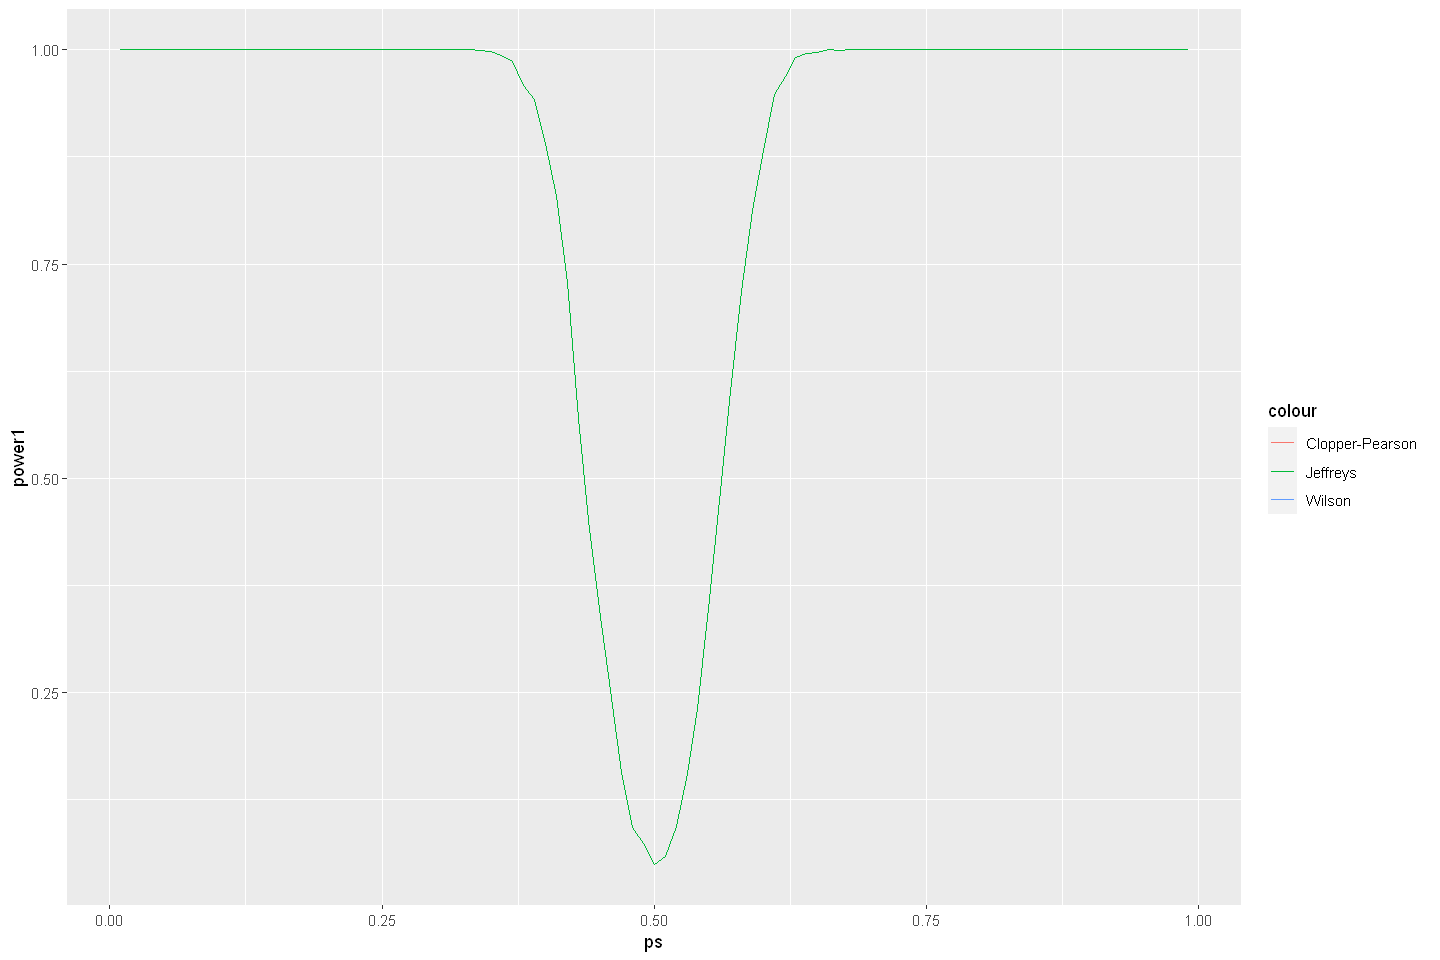

In [32]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    intervals <- BinomCI(S, n, method="wilson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power1 <- append(power1, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="clopper-pearson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power2 <- append(power2, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="jeffreys")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

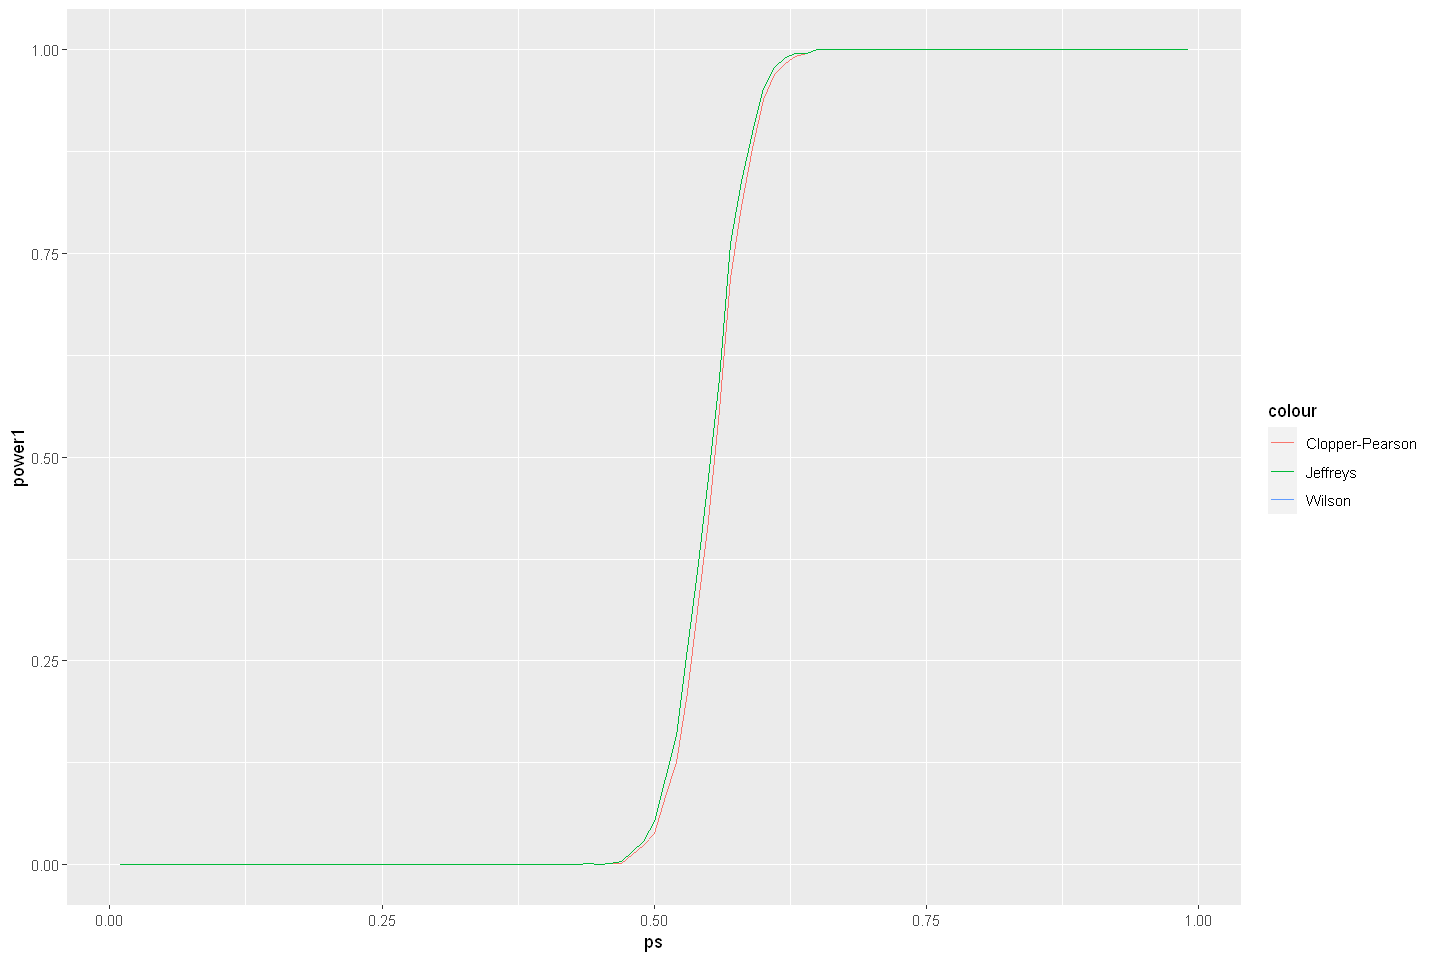

In [47]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    intervals <- BinomCI(S, n, method="wilson", sides="left")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power1 <- append(power1, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="clopper-pearson", sides="left")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power2 <- append(power2, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="jeffreys", sides="left")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

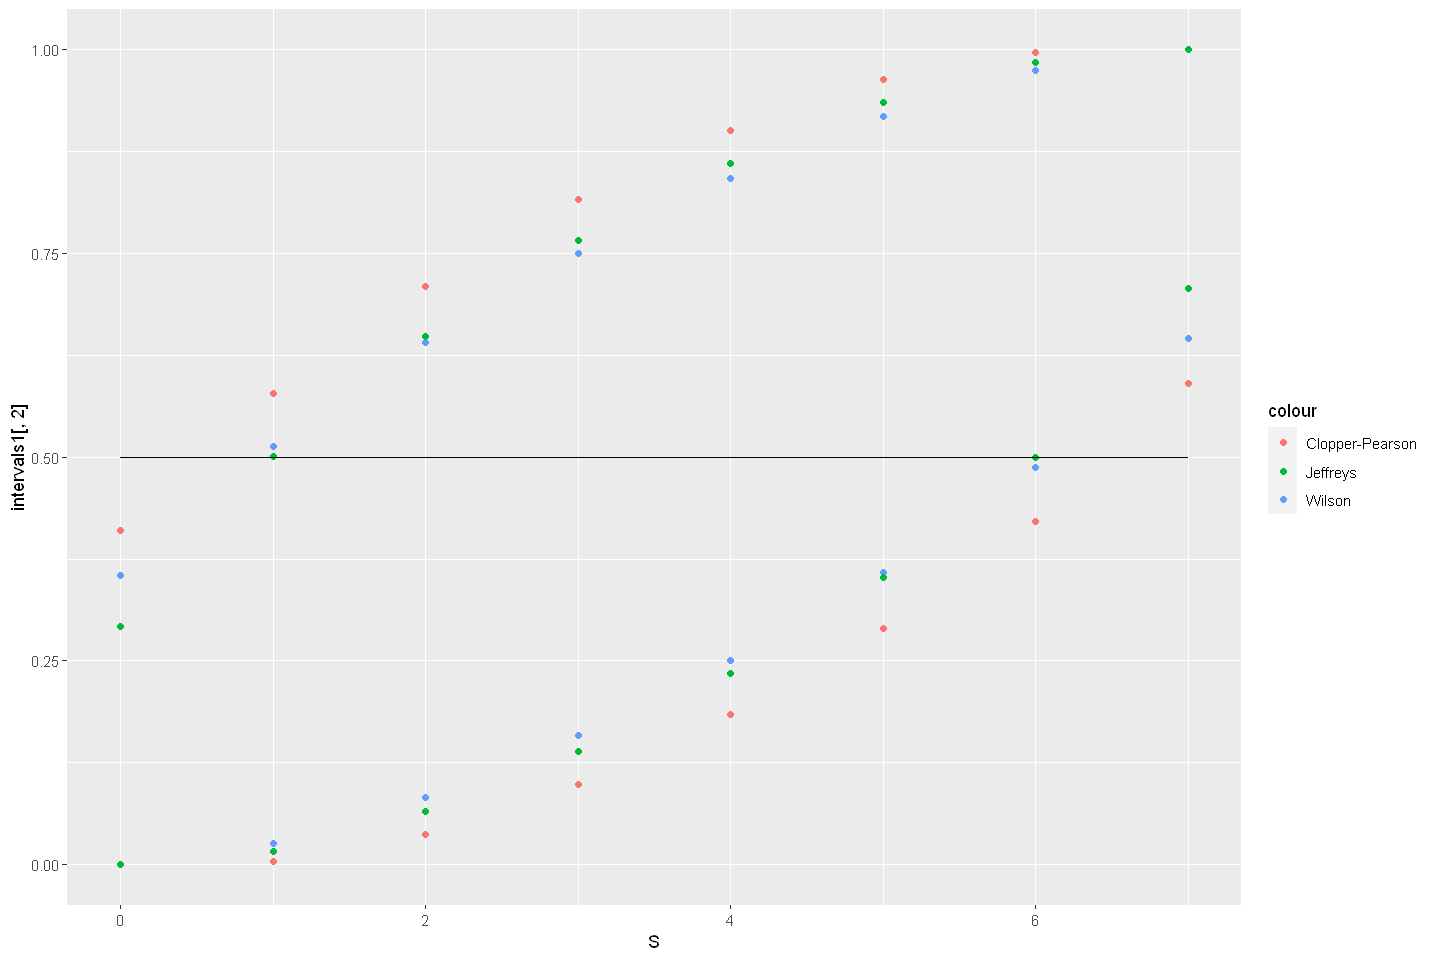

In [23]:
n <- 7
alpha <- 0.05
S <- 0:n

intervals1 <- BinomCI(S, n, method="wilson")
intervals2 <- BinomCI(S, n, method="clopper-pearson")
intervals3 <- BinomCI(S, n, method="jeffreys")

ggplot() +
  geom_point(aes(S, intervals1[,2], col="Wilson")) + geom_point(aes(S, intervals1[,3], col="Wilson")) +
  geom_point(aes(S, intervals2[,2], col="Clopper-Pearson")) + geom_point(aes(S, intervals2[,3], col="Clopper-Pearson")) +
  geom_point(aes(S, intervals3[,2], col="Jeffreys")) + geom_point(aes(S, intervals3[,3], col="Jeffreys")) +
  geom_line(aes(S, 0.5))

,est,lwr.ci,upr.ci
x.1,0.00000000,0.000000000,1
x.2,0.02857143,0.006400088,1
x.3,0.05714286,0.019093390,1
x.4,0.08571429,0.034775809,1
x.5,0.11428571,0.052356000,1
x.6,0.14285714,0.071308700,1
x.7,0.17142857,0.091332872,1
x.8,0.20000000,0.112237253,1
x.9,0.22857143,0.133891841,1
x.10,0.25714286,0.156204063,1


,est,lwr.ci,upr.ci
x.1,0.00000000,0.000000000,1
x.2,0.02857143,0.001464449,1
x.3,0.05714286,0.010248665,1
x.4,0.08571429,0.023771017,1
x.5,0.11428571,0.039992886,1
x.6,0.14285714,0.058023073,1
x.7,0.17142857,0.077394420,1
x.8,0.20000000,0.097828368,1
x.9,0.22857143,0.119143995,1
x.10,0.25714286,0.141216677,1


,est,lwr.ci,upr.ci
x.1,0.00000000,0.000000000,1
x.2,0.02857143,0.005049976,1
x.3,0.05714286,0.016586809,1
x.4,0.08571429,0.031614763,1
x.5,0.11428571,0.048817208,1
x.6,0.14285714,0.067561506,1
x.7,0.17142857,0.087491541,1
x.8,0.20000000,0.108384770,1
x.9,0.22857143,0.130091950,1
x.10,0.25714286,0.152507946,1


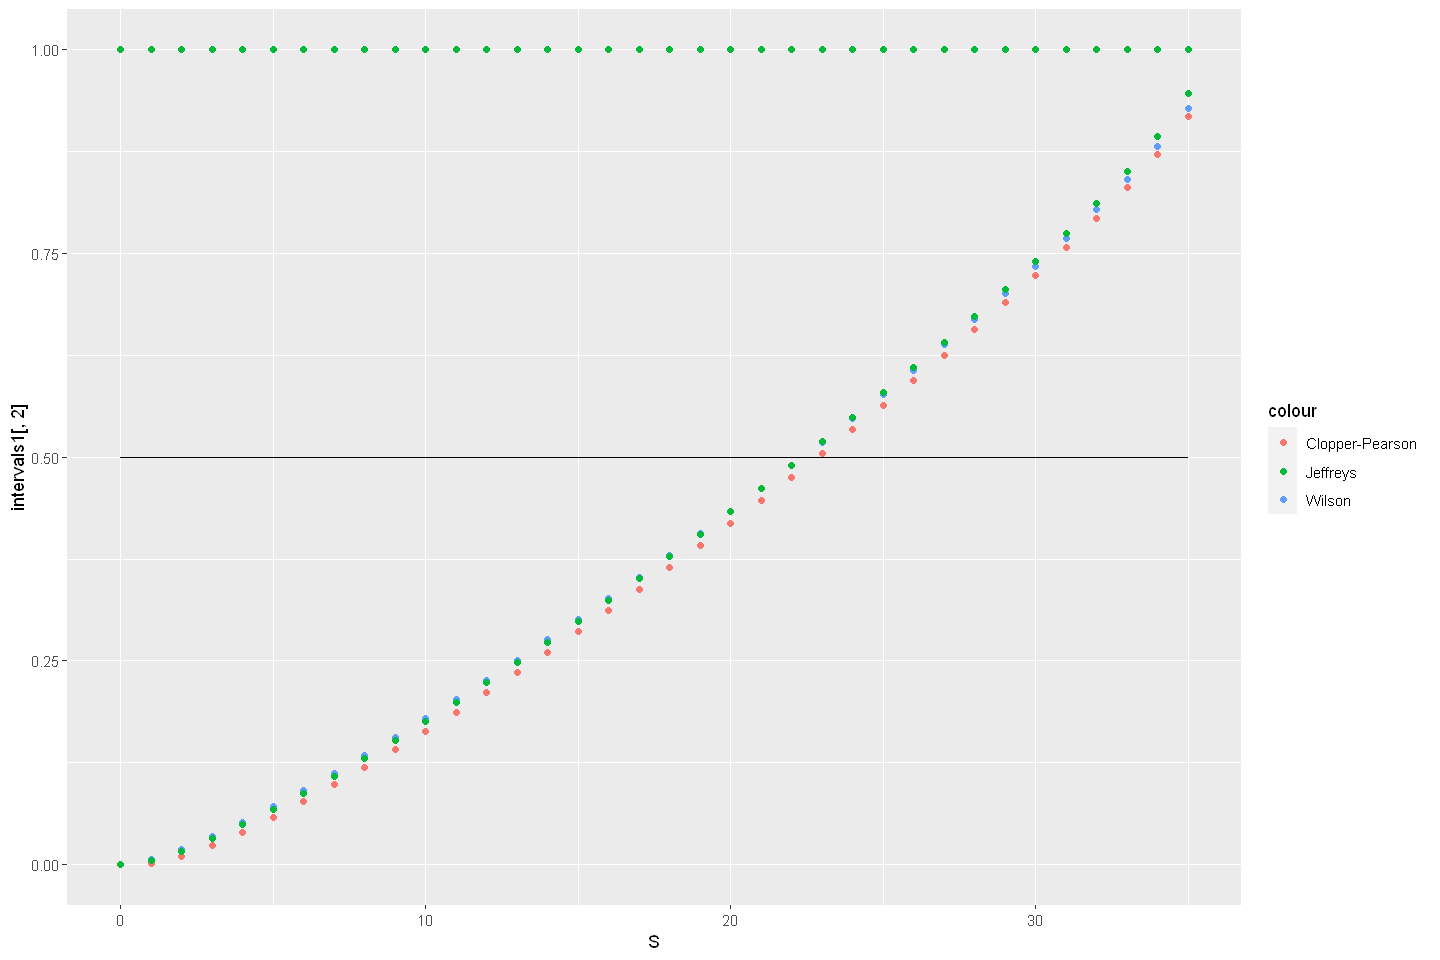

In [44]:
n <- 260
alpha <- 0.05
S <- 0:n

intervals1 <- BinomCI(S, n, method="wilson", sides="left")
intervals1
intervals2 <- BinomCI(S, n, method="clopper-pearson", sides="left")
intervals2
intervals3 <- BinomCI(S, n, method="jeffreys", sides="left")
intervals3

ggplot() +
  geom_point(aes(S, intervals1[,2], col="Wilson")) + geom_point(aes(S, intervals1[,3], col="Wilson")) +
  geom_point(aes(S, intervals2[,2], col="Clopper-Pearson")) + geom_point(aes(S, intervals2[,3], col="Clopper-Pearson")) +
  geom_point(aes(S, intervals3[,2], col="Jeffreys")) + geom_point(aes(S, intervals3[,3], col="Jeffreys")) +
  geom_line(aes(S, 0.5))

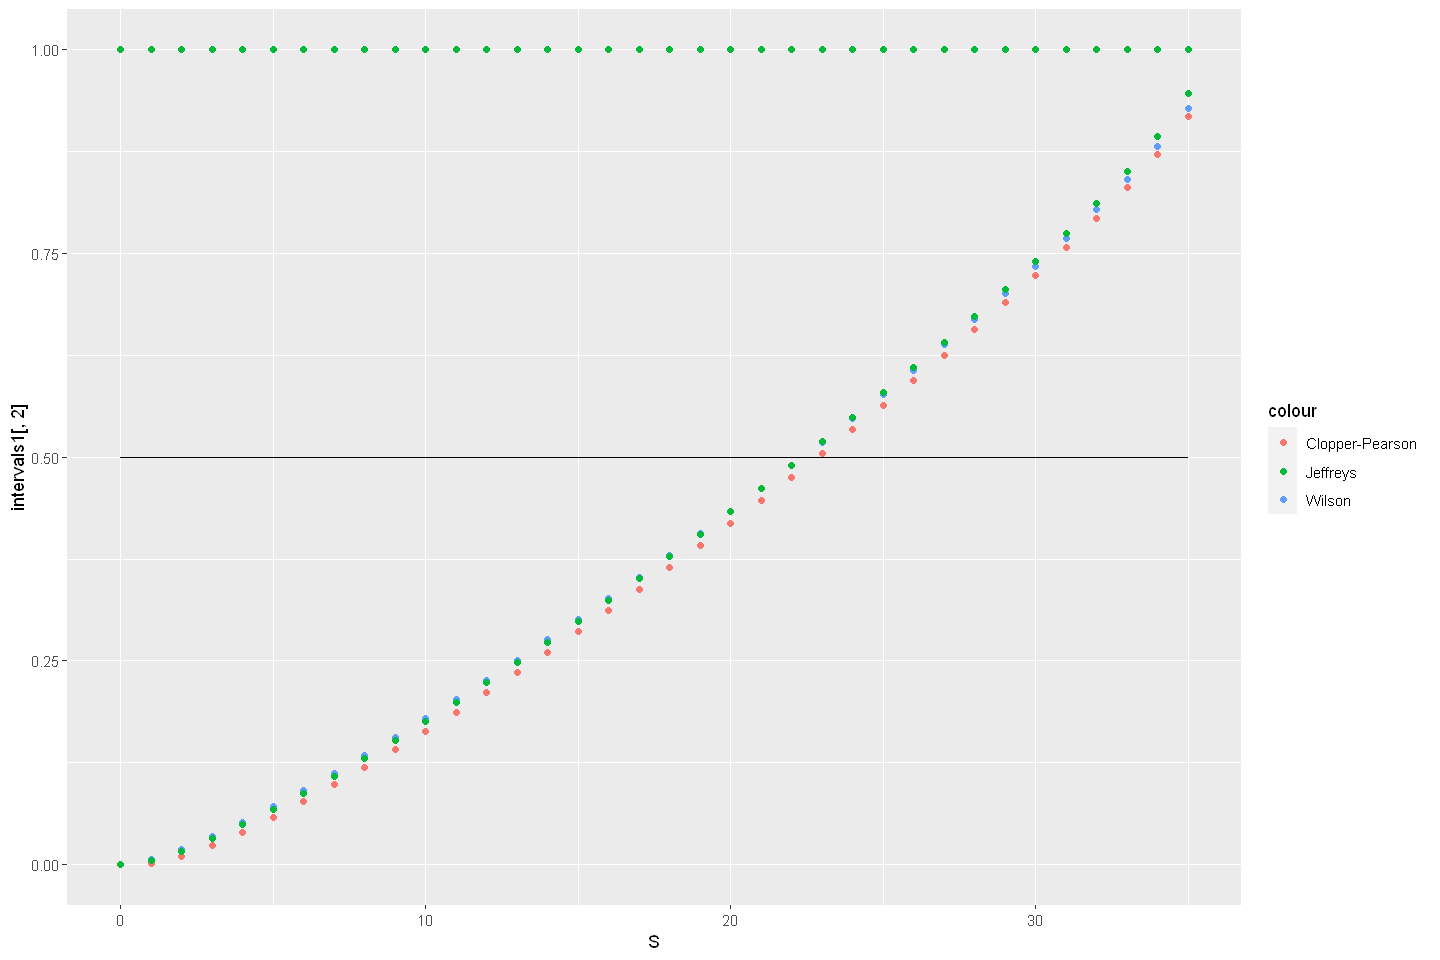

In [45]:
n <- 35
alpha <- 0.05
S <- 0:n

intervals1 <- BinomCI(S, n, method="wilson", sides="left")
intervals2 <- BinomCI(S, n, method="clopper-pearson", sides="left")
intervals3 <- BinomCI(S, n, method="jeffreys", sides="left")

ggplot() +
  geom_point(aes(S, intervals1[,2], col="Wilson")) + geom_point(aes(S, intervals1[,3], col="Wilson")) +
  geom_point(aes(S, intervals2[,2], col="Clopper-Pearson")) + geom_point(aes(S, intervals2[,3], col="Clopper-Pearson")) +
  geom_point(aes(S, intervals3[,2], col="Jeffreys")) + geom_point(aes(S, intervals3[,3], col="Jeffreys")) +
  geom_line(aes(S, 0.5))